# 1 Introdução

Neste notebook, exploraremos técnicas de redução de dimensionalidade, incluindo PCA (Análise de Componentes Principais), t-SNE (t-distributed Stochastic Neighbor Embedding) e LDA (Linear Discriminant Analysis). Vamos analisar como essas técnicas podem ser aplicadas para melhorar a visualização e o desempenho de modelos de machine learning.

# 2 Importação de Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml

# 3 Carregamento e Exploração do Dataset

## 3.1 Descrição do Dataset

Para este exemplo, utilizaremos o famoso dataset "Adult Income" (também conhecido como "Census Income"). Este dataset contém informações sobre indivíduos, coletadas pelo censo dos EUA, e é utilizado para prever se uma pessoa ganha mais ou menos de 50.000 dólares por ano. É amplamente utilizado em estudos de machine learning devido à sua complexidade e à variedade de variáveis envolvidas.

- Principais Características do Dataset:
    - age: Idade do indivíduo.
    - workclass: Tipo de trabalho (ex.: Private, Self-emp-not-inc, Federal-gov).
    - fnlwgt: Peso final de amostra, uma medida usada pelo censo para ajustar a amostra ao tamanho total da população.
    - education: Nível de escolaridade (ex.: Bachelors, Masters, Doctorate).
    - education-num: Número de anos de escolaridade (quantitativo).
    - marital-status: Estado civil (ex.: Married-civ-spouse, Never-married).
    - occupation: Ocupação do indivíduo (ex.: Tech-support, Craft-repair, Exec-managerial).
    - relationship: Relação com o chefe de família (ex.: Husband, Not-in-family).
    - race: Raça do indivíduo (ex.: White, Black, Asian-Pac-Islander).
    - sex: Sexo do indivíduo (Male ou Female).
    - hours-per-week: Número de horas trabalhadas por semana.
    - native-country: País de origem do indivíduo (ex.: United States, Mexico, Philippines).
    - income: Renda anual do indivíduo (≤50K ou >50K).

- Importância das Variáveis:
    - Idade (age): Pode influenciar o tipo de trabalho e o nível de renda.
    - Tipo de Trabalho (workclass): Indica o setor em que o indivíduo está empregado, o que pode afetar o salário.
    - Peso Final de Amostra (fnlwgt): Usado para ajustar a amostra ao tamanho total da população.
    - Nível de Escolaridade (education e education-num): Geralmente correlacionado com o nível de renda.
    - Estado Civil (marital-status): Pode refletir padrões econômicos e sociais que impactam a renda.
    - Ocupação (occupation): Determina o tipo de trabalho e potencial de ganho.
    - Relação com o Chefe de Família (relationship): Pode ajudar a entender a estrutura familiar e seu impacto na renda.
    - Raça (race) e Sexo (sex): Fatores importantes que podem influenciar as oportunidades e a renda.
    - Horas Trabalhadas por Semana (hours-per-week): Geralmente está correlacionado com a renda.
    - País de Origem (native-country): Pode refletir diferenças regionais na renda.

- Fonte do Dataset:
    - O dataset está originalmente disponível em: Adult Income Dataset no UCI Machine Learning Repository
    - Para carregar o dataset em um DataFrame do pandas:
    
        from sklearn.datasets import fetch_openml
        
        data = fetch_openml(name='adult', version=2, as_frame=True)

In [3]:
# Carregar o dataset Adult Income
df = pd.read_csv("datasets/adult_income.csv").head(1000)

In [5]:
# Exibir as primeiras linhas do DataFrame
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
# Excluir colunas não relevantes
df = df.drop(columns=['fnlwgt'])

# Preencher valores faltantes
df = df.replace(' ?', np.nan)
df = df.dropna()

# Definir variáveis independentes (X) e dependentes (y)
X = df.drop(columns=['class'])
y = df['class'].apply(lambda x: 1 if x == '>50K' else 0)  # Convertendo para 0 e 1

# Identificar variáveis categóricas e numéricas
categorical_features = X.select_dtypes(include=['category']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Pipeline para pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

# 4 Redução de Dimensionalidade

## 4.1 PCA

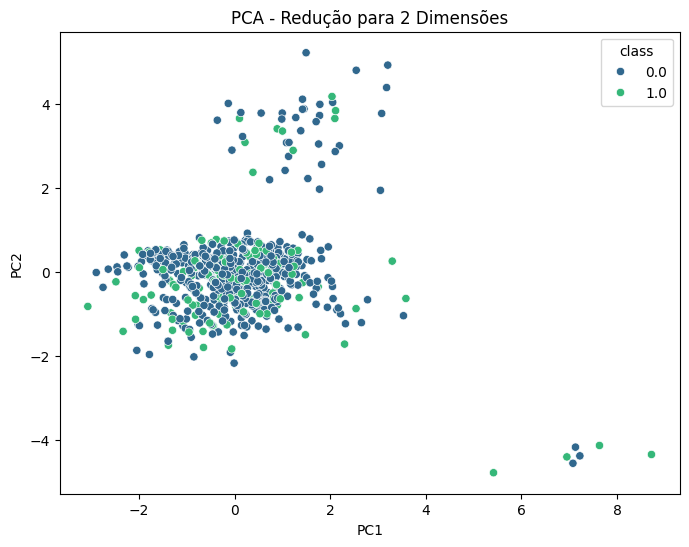

In [14]:
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Criar um DataFrame para visualização
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['class'] = y

# Plotar os resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=df_pca, palette='viridis')
plt.title('PCA - Redução para 2 Dimensões')
plt.show()

## 4.2 t-SNE

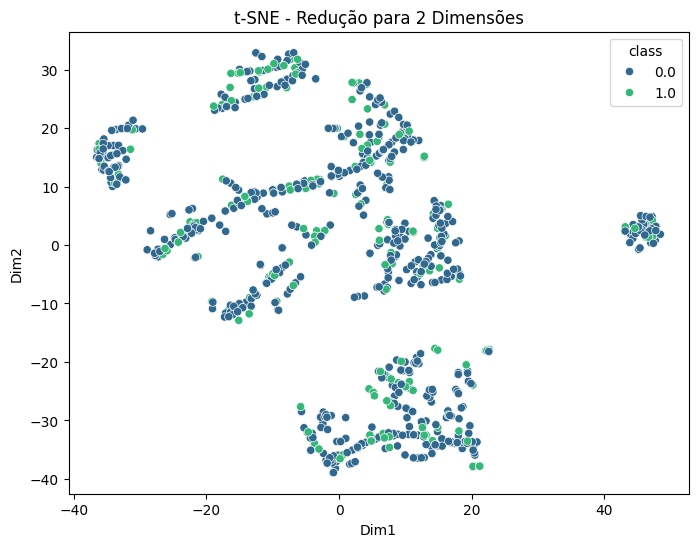

In [15]:
# Aplicar t-SNE
tsne = TSNE(n_components=2, init='random', random_state=0)
X_tsne = tsne.fit_transform(X_processed)

# Criar um DataFrame para visualização
df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['class'] = y

# Plotar os resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Dim1', y='Dim2', hue='class', data=df_tsne, palette='viridis')
plt.title('t-SNE - Redução para 2 Dimensões')
plt.show()

## 4.3 LDA

In [21]:
## Aplicar LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_processed, y)
## Criar um DataFrame para visualização
#df_lda = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
#df_lda['income'] = y.values
## Plotar os resultados
#plt.figure(figsize=(8, 6))
#sns.scatterplot(x='LD1', y='LD2', hue='income', data=df_lda, palette='viridis')
#plt.title('LDA - Redução para 2 Dimensões')
#plt.show()

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

# 5 Modelagem de Machine Learning

## 5.1 Dados Brutos

In [17]:
# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=0)

# Treinar o modelo
model_raw = RandomForestClassifier(n_estimators=100, random_state=0)
model_raw.fit(X_train, y_train)

# Fazer previsões
y_pred_raw = model_raw.predict(X_test)

# Avaliar o desempenho
print("Relatório de Classificação (Dados Brutos):")
print(classification_report(y_test, y_pred_raw))

Relatório de Classificação (Dados Brutos):
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       226
           1       0.33      0.40      0.36        53

    accuracy                           0.73       279
   macro avg       0.59      0.61      0.60       279
weighted avg       0.75      0.73      0.74       279



## 5.2 Dados Tratados com PCA

In [18]:
# Dividir o dataset reduzido em treino e teste
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

# Treinar o modelo
model_pca = RandomForestClassifier(n_estimators=100, random_state=0)
model_pca.fit(X_train_pca, y_train)

# Fazer previsões
y_pred_pca = model_pca.predict(X_test_pca)

# Avaliar o desempenho
print("Relatório de Classificação (Dados Tratados - PCA):")
print(classification_report(y_test, y_pred_pca))

Relatório de Classificação (Dados Tratados - PCA):
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       226
           1       0.29      0.38      0.33        53

    accuracy                           0.71       279
   macro avg       0.57      0.58      0.57       279
weighted avg       0.74      0.71      0.72       279



## 5.3 Dados Tratados com t-SNE

In [19]:
# Dividir o dataset reduzido em treino e teste
X_train_tsne, X_test_tsne, y_train, y_test = train_test_split(X_tsne, y, test_size=0.3, random_state=0)

# Treinar o modelo
model_tsne = RandomForestClassifier(n_estimators=100, random_state=0)
model_tsne.fit(X_train_tsne, y_train)

# Fazer previsões
y_pred_tsne = model_tsne.predict(X_test_tsne)

# Avaliar o desempenho
print("Relatório de Classificação (Dados Tratados - t-SNE):")
print(classification_report(y_test, y_pred_tsne))

Relatório de Classificação (Dados Tratados - t-SNE):
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       226
           1       0.24      0.30      0.27        53

    accuracy                           0.68       279
   macro avg       0.53      0.54      0.53       279
weighted avg       0.71      0.68      0.70       279



## 5.4 Dados Tratados com LDA

In [11]:
## Dividir o dataset reduzido em treino e teste
#X_train_lda, X_test_lda, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=0)
#
## Treinar o modelo
#model_lda = RandomForestClassifier(n_estimators=100, random_state=0)
#model_lda.fit(X_train_lda, y_train)
#
## Fazer previsões
#y_pred_lda = model_lda.predict(X_test_lda)
#
## Avaliar o desempenho
#print("Relatório de Classificação (Dados Tratados - LDA):")
#print(classification_report(y_test, y_pred_lda))